In [11]:
import os
import sys
#import argparse
import glob
import pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [15]:
sns.set_style("white")

In [2]:
pd.__version__

'1.0.1'

In [27]:
dist_csvs = glob.glob("../distances/*scaled10*csv")

In [28]:
distDF = pd.concat([pd.read_csv(csv, index_col=0).assign(filename=os.path.basename(csv)) for csv in dist_csvs])

In [29]:
# add new columns based on scaled, ksize etc in the filenames
# NOTE:this is specific to the "evol_paths_first_seven_" basename
distDF["scaled"]= distDF["filename"].str.extract(r"scaled(\d*)")
distDF["ksize"] = distDF["filename"].str.extract(r"k(\d*)")
distDF["molecule"] = distDF["filename"].str.extract(r"evol_paths_(\w*)")
distDF["full_alphabet"] = distDF["filename"].str.extract(r"\w.(\w*)_scaled")
distDF["alphabet"] = distDF["full_alphabet"].str.replace("translate_", "")
steps_to_common_ancestor = {"species": 0, "genus": 1, "family": 2, "order": 3, "class": 4, "phylum": 5, "superkingdom": 6}
distDF["steps to common ancestor"] = distDF.apply(lambda x: steps_to_common_ancestor[x["rank"]], axis=1)
distDF = distDF.reset_index()
distDF = distDF.rename(columns={'index': 'path'})

In [30]:
distDF

,path,rank,accession,jaccard,filename,scaled,ksize,molecule,full_alphabet,alphabet,steps to common ancestor
0,path1,species,GB_GCA_001593925.1_protein.faa.gz,1.000000,evol_paths_pep.protein_scaled10_k13.jaccard_fr...,10,13,pep,protein,protein,0
1,path1,genus,GB_GCA_001593935.1_protein.faa.gz,0.074707,evol_paths_pep.protein_scaled10_k13.jaccard_fr...,10,13,pep,protein,protein,1
2,path1,family,GB_GCA_001593845.1_protein.faa.gz,0.009853,evol_paths_pep.protein_scaled10_k13.jaccard_fr...,10,13,pep,protein,protein,2
3,path1,order,GB_GCA_002507245.1_protein.faa.gz,0.004769,evol_paths_pep.protein_scaled10_k13.jaccard_fr...,10,13,pep,protein,protein,3
4,path1,class,GB_GCA_001774245.1_protein.faa.gz,0.000485,evol_paths_pep.protein_scaled10_k13.jaccard_fr...,10,13,pep,protein,protein,4
...,...,...,...,...,...,...,...,...,...,...,...
251799,path999,family,GB_GCA_900317525.1_protein.faa.gz,0.013424,evol_paths_pep.protein_scaled10_k9.jaccard_fro...,10,9,pep,protein,protein,2
251800,path999,order,GB_GCA_003446315.1_protein.faa.gz,0.002891,evol_paths_pep.protein_scaled10_k9.jaccard_fro...,10,9,pep,protein,protein,3
251801,path999,class,GB_GCA_001304935.1_protein.faa.gz,0.002881,evol_paths_pep.protein_scaled10_k9.jaccard_fro...,10,9,pep,protein,protein,4
251802,path999,phylum,GB_GCA_002391555.1_protein.faa.gz,0.003870,evol_paths_pep.protein_scaled10_k9.jaccard_fro...,10,9,pep,protein,protein,5


In [33]:
# remove species
distDF_nosp = distDF[distDF["rank"] != "species"].copy()
distDF_nosp['log_jaccard'] = np.log(distDF_nosp['jaccard'])
#distDF_nosp = distDF_nosp.reset_index()
#distDF_nosp = distDF_nosp.rename(columns={'index': 'path'})

# check super low jaccard vals, so can 
#distDF_nosp[distDF_nosp["jaccard"] < .0001]

/Users/tessa/miniconda3/envs/sklearn/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
distDF_nosp = distDF_nosp[distDF_nosp.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [37]:
#distDF_nosp

In [38]:
dayhoff19 = distDF_nosp[(distDF_nosp["alphabet"] == "dayhoff")  & (distDF_nosp["ksize"] == "19")]

In [39]:
dayhoff19

,path,rank,accession,jaccard,filename,scaled,ksize,molecule,full_alphabet,alphabet,steps to common ancestor,log_jaccard
207369,path1,genus,GB_GCA_001593935.1_protein.faa.gz,0.125545,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,1,-2.075092
207370,path1,family,GB_GCA_001593845.1_protein.faa.gz,0.020943,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,2,-3.865933
207371,path1,order,GB_GCA_002507245.1_protein.faa.gz,0.012222,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,3,-4.404524
207372,path1,class,GB_GCA_001774245.1_protein.faa.gz,0.001808,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,4,-6.315335
207373,path1,phylum,GB_GCA_002254895.1_protein.faa.gz,0.000450,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,5,-7.707135
...,...,...,...,...,...,...,...,...,...,...,...,...
222175,path999,family,GB_GCA_900317525.1_protein.faa.gz,0.013868,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,2,-4.278161
222176,path999,order,GB_GCA_003446315.1_protein.faa.gz,0.002650,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,3,-5.933378
222177,path999,class,GB_GCA_001304935.1_protein.faa.gz,0.002449,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,4,-6.012209
222178,path999,phylum,GB_GCA_002391555.1_protein.faa.gz,0.003853,evol_paths_pep.dayhoff_scaled10_k19.jaccard_fr...,10,19,pep,dayhoff,dayhoff,5,-5.558928


## Distribution of jaccard, log_jaccard values

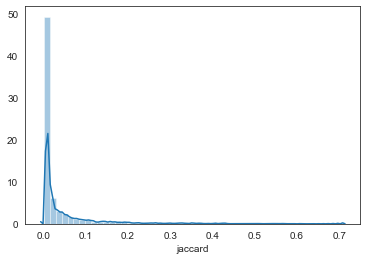

In [43]:
g = sns.distplot(dayhoff19["jaccard"])#, x="jaccard", hue="ksize") #, col="full_alphabet")

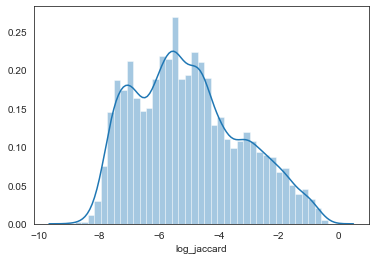

In [44]:
g = sns.distplot(dayhoff19["log_jaccard"])

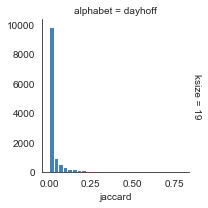

In [47]:
g = sns.FacetGrid(dayhoff19, row="ksize", col="alphabet", margin_titles=True)
#bins = np.linspace(-10, 1, 30)
bins = np.linspace(0, 0.8, 30)

g.map(plt.hist, "jaccard", color="steelblue", bins=bins)


#g = sns.catplot(data=dayhoff19, x="jaccard", hue="ksize", col="full_alphabet", kind="count")

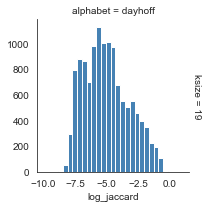

In [57]:
g = sns.FacetGrid(dayhoff19, row="ksize", col="alphabet", margin_titles=True)
bins = np.linspace(-10, 1, 30)
g.map(plt.hist, "log_jaccard", color="steelblue", bins=bins)

In [1]:
# too many blank grids, bc non-overlapping ksizes
#g = sns.FacetGrid(distDF_nosp, row="ksize", col="alphabet", margin_titles=True)
#bins = np.linspace(-10, 1, 30)
#g.map(plt.hist, "log_jaccard", color="steelblue", bins=bins)

In [51]:
# let's plot them by alpha, so dont get so many empty plots

prot=distDF_nosp[distDF_nosp["alphabet"]=="protein"]
dayhoff=distDF_nosp[distDF_nosp["alphabet"]=="dayhoff"]
hp=distDF_nosp[distDF_nosp["alphabet"]=="hp"]
nucl=distDF_nosp[distDF_nosp["alphabet"]=="nucleotide"]

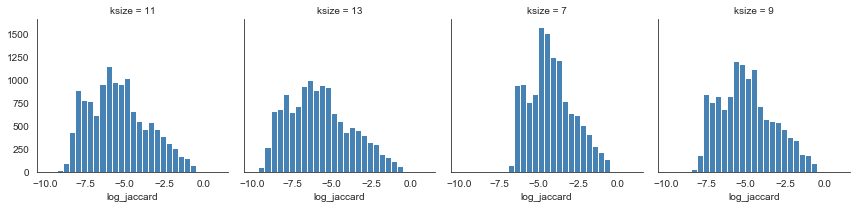

In [53]:
g = sns.FacetGrid(prot, col="ksize", margin_titles=True)
bins = np.linspace(-10, 1, 30)
g.map(plt.hist, "log_jaccard", color="steelblue", bins=bins)

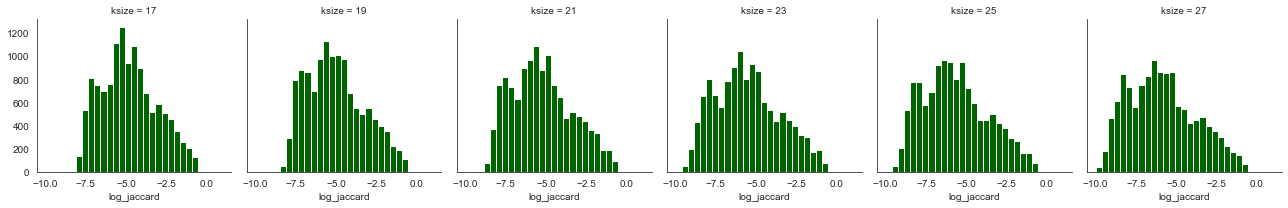

In [54]:
g = sns.FacetGrid(dayhoff, col="ksize", margin_titles=True)
bins = np.linspace(-10, 1, 30)
g.map(plt.hist, "log_jaccard", color="darkgreen", bins=bins)

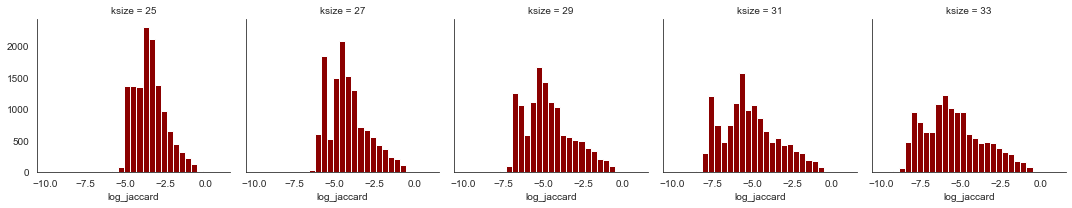

In [59]:
g = sns.FacetGrid(hp, col="ksize",margin_titles=True)
bins = np.linspace(-10, 1, 30)
g.map(plt.hist, "log_jaccard", color="darkred", bins=bins)

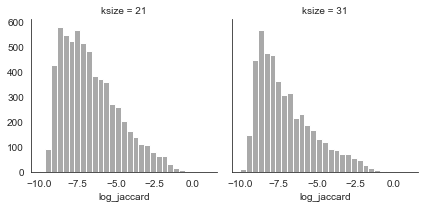

In [61]:
g = sns.FacetGrid(nucl, col="ksize", margin_titles=True)
bins = np.linspace(-10, 1, 30)
g.map(plt.hist, "log_jaccard", color="darkgrey", bins=bins)

## Now, logistic regression on jaccard + steps to common ancestor

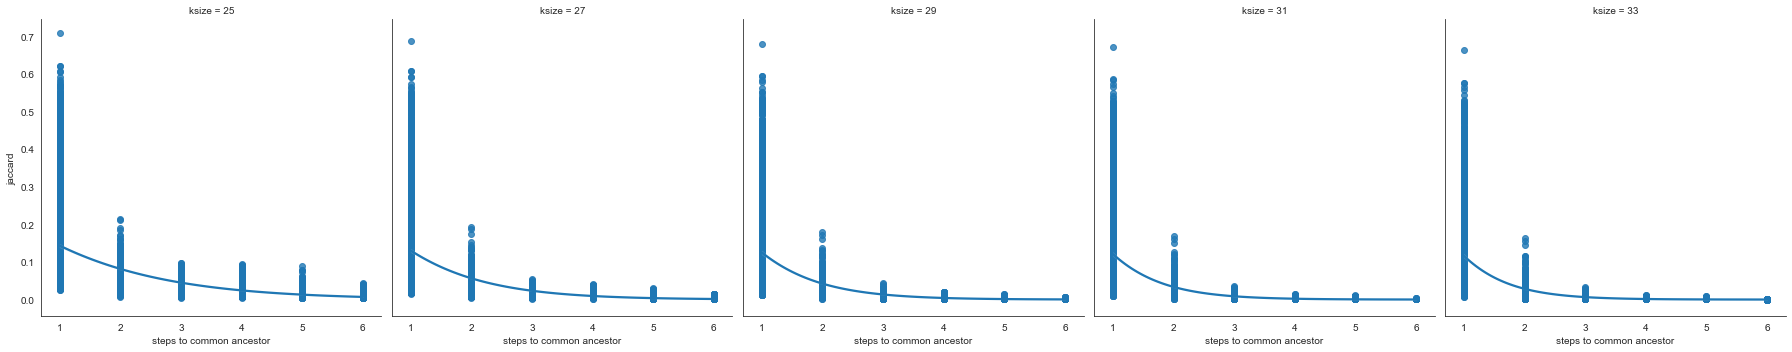

In [67]:
g =sns.lmplot(data=hp, x="steps to common ancestor", y="jaccard", col="ksize", logistic=True)

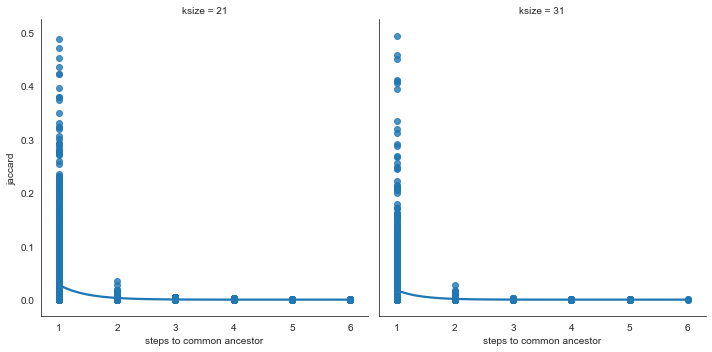

In [68]:
g =sns.lmplot(data=nucl, x="steps to common ancestor", y="jaccard", col="ksize", logistic=True)

`x_estimator` = callable that maps vector -> scalar, optional
Apply this function to each unique value of x and plot the resulting estimate.

This is useful when x is a discrete variable. If x_ci is given, this estimate will be bootstrapped and a confidence interval will be drawn.

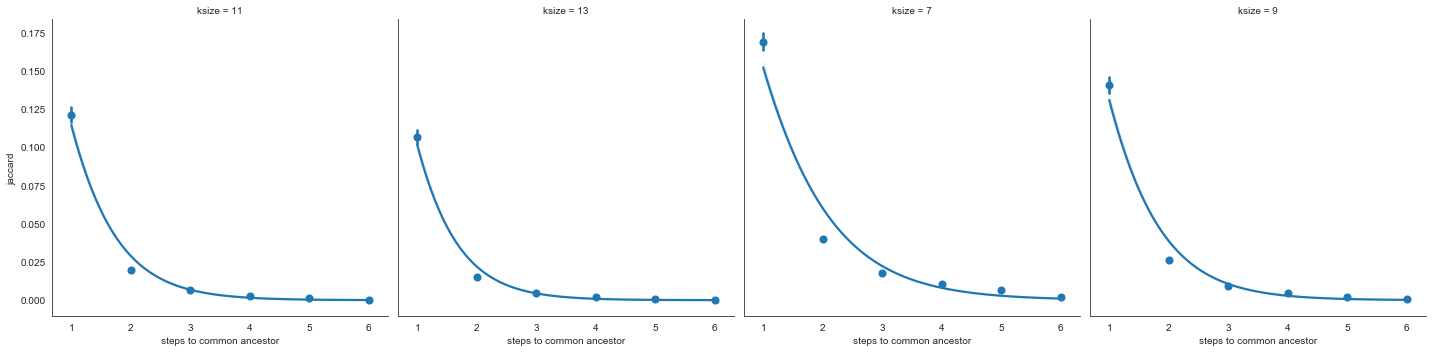

In [63]:
g =sns.lmplot(data=prot, x="steps to common ancestor", y="jaccard", col="ksize", logistic=True, x_estimator=np.mean)

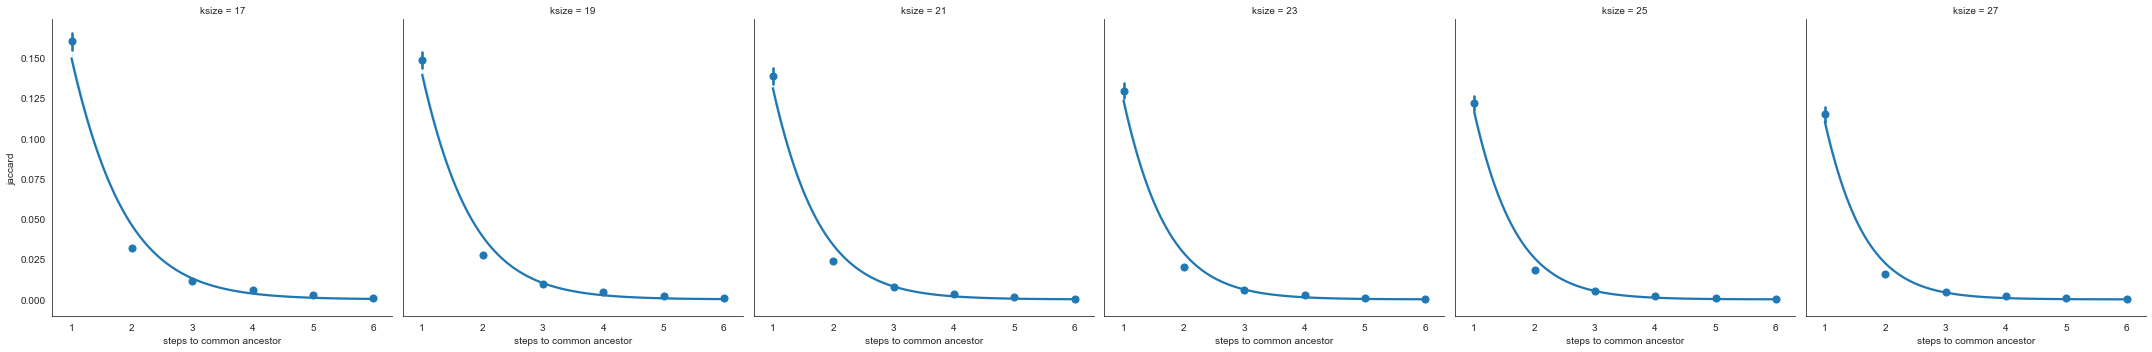

In [64]:
g =sns.lmplot(data=dayhoff, x="steps to common ancestor", y="jaccard", col="ksize", logistic=True, x_estimator=np.mean)

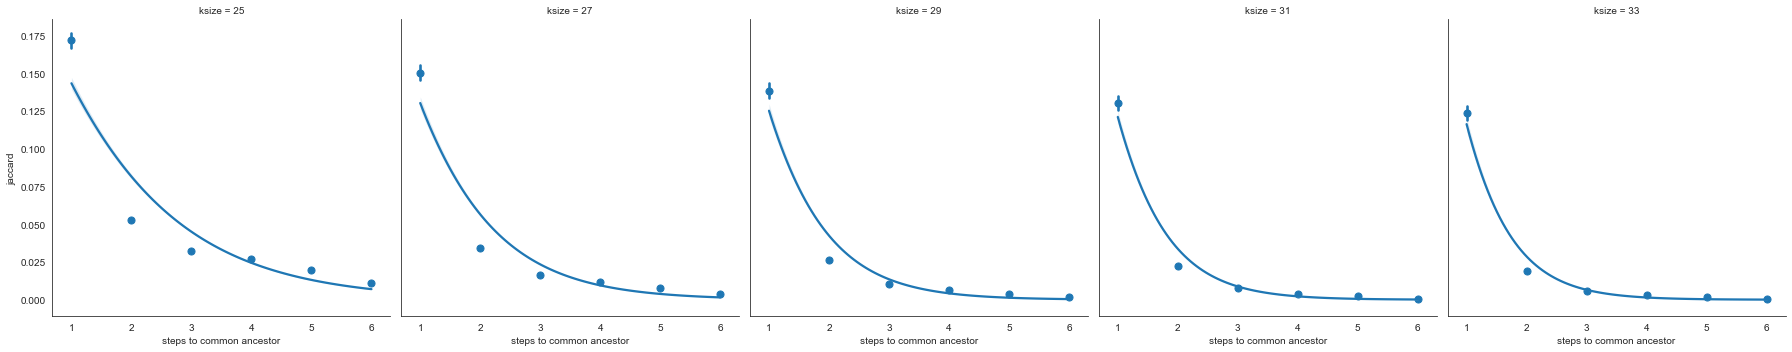

In [65]:
g =sns.lmplot(data=hp, x="steps to common ancestor", y="jaccard", col="ksize", logistic=True, x_estimator=np.mean)

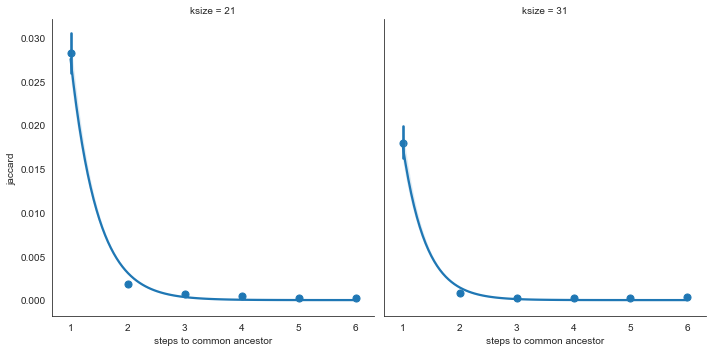

In [66]:
g =sns.lmplot(data=nucl, x="steps to common ancestor", y="jaccard", col="ksize", logistic=True, x_estimator=np.mean)

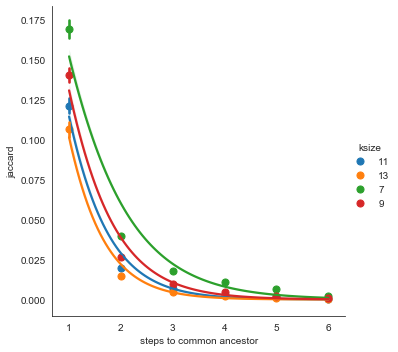

In [69]:
g =sns.lmplot(data=prot, x="steps to common ancestor", y="jaccard", hue="ksize", logistic=True, x_estimator=np.mean)

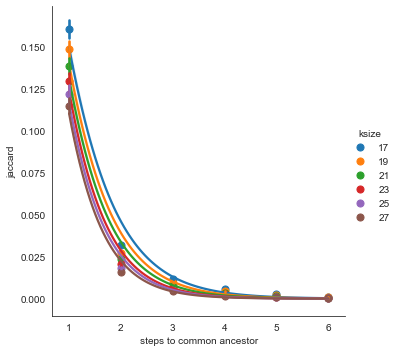

In [71]:
g =sns.lmplot(data=dayhoff, x="steps to common ancestor", y="jaccard", hue="ksize", logistic=True, x_estimator=np.mean)

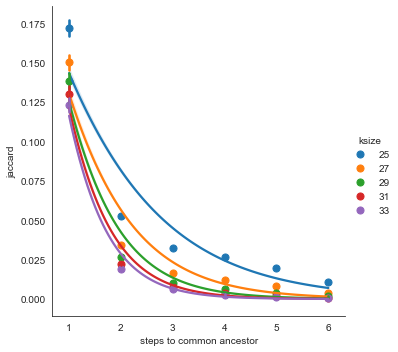

In [72]:
g =sns.lmplot(data=hp, x="steps to common ancestor", y="jaccard", hue="ksize", logistic=True, x_estimator=np.mean)

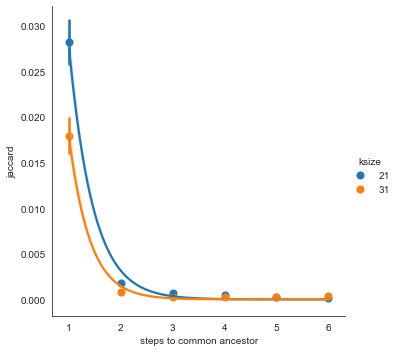

In [73]:
g =sns.lmplot(data=nucl, x="steps to common ancestor", y="jaccard", hue="ksize", logistic=True, x_estimator=np.mean)

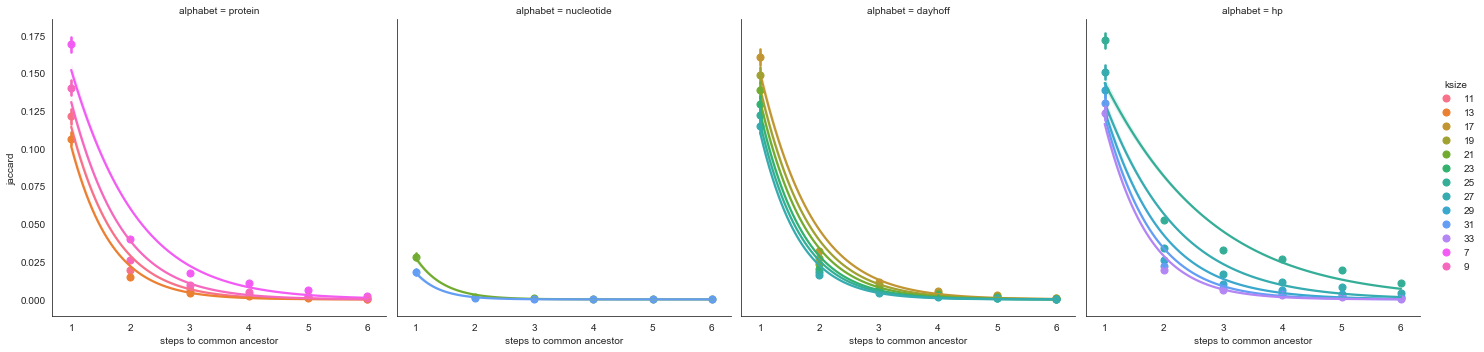

In [70]:
g =sns.lmplot(data=distDF_nosp, x="steps to common ancestor", y="jaccard", hue="ksize", col="alphabet", logistic=True, x_estimator=np.mean)

## Regressions using sklearn

In [74]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = dayhoff19["jaccard"]
y = dayhoff19["steps to common ancestor"] 

X_reshaped = X.to_numpy().reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10156, 1)
(2540, 1)
(10156,)
(2540,)


### Linear Regression

In [85]:
#just linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
metrics.explained_variance_score(y_test, y_pred)
#print('log: ', metrics.accuracy_score(y_test, y_pred))
#print(reg.intercept_, reg.coef_)

0.2829707269560584

### Logistic Regression

In [91]:
#penalty='none' switches off regularization
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none', max_iter=1000) #, fit_intercept=False) #
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('explained variance score: ', metrics.explained_variance_score(y_test, y_pred))
print('max error: ', metrics.max_error(y_test, y_pred))
print('mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('mean squared log error: ', metrics.mean_squared_log_error(y_test, y_pred))
print('median absolute error: ', metrics.median_absolute_error(y_test, y_pred))
print('r2: ', metrics.r2_score(y_test, y_pred))

#print('log: ', metrics.accuracy_score(y_test, y_pred))
#print(logreg.intercept_, logreg.coef_)

explained variance score:  0.8695018044811827
max error:  3
mean absolute error:  0.3535433070866142
mean squared error:  0.3858267716535433
mean squared log error:  0.02430708570551189
median absolute error:  0.0
r2:  0.8643314437549952


In [109]:

#penalty='none' switches off regularization
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none', max_iter=1000, multi_class='multinomial', solver='lbfgs') #, fit_intercept=False) #
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('explained variance score: ', metrics.explained_variance_score(y_test, y_pred))
print('max error: ', metrics.max_error(y_test, y_pred))
print('mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('mean squared log error: ', metrics.mean_squared_log_error(y_test, y_pred))
print('median absolute error: ', metrics.median_absolute_error(y_test, y_pred))
print('r2: ', metrics.r2_score(y_test, y_pred))

# score test set? all?
print("score: ", logreg.score(X_test, y_test))
print("score: ", logreg.score(X_train, y_train))


#print('log: ', metrics.accuracy_score(y_test, y_pred))
#print(logreg.intercept_, logreg.coef_)

explained variance score:  0.8695018044811827
max error:  3
mean absolute error:  0.3535433070866142
mean squared error:  0.3858267716535433
mean squared log error:  0.02430708570551189
median absolute error:  0.0
r2:  0.8643314437549952
score:  0.6618110236220472
score:  0.6697518708152816


In [115]:

from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV( max_iter=1000, multi_class='multinomial', solver='lbfgs') #, fit_intercept=False) #
logreg.fit(X_reshaped, y)
logreg.predict(X_reshaped)
logreg.score(X_reshaped, y)
#y_pred = logreg.predict(X_reshaped)
#print('explained variance score: ', metrics.explained_variance_score(y_test, y_pred))
#print('max error: ', metrics.max_error(y_test, y_pred))
#print('mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
#print('mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
#print('mean squared log error: ', metrics.mean_squared_log_error(y_test, y_pred))
#print('median absolute error: ', metrics.median_absolute_error(y_test, y_pred))
#print('r2: ', metrics.r2_score(y_test, y_pred))

# score test set? all?
#print("score: ", logreg.score(X_test, y_test))
#print("score: ", logreg.score(X_train, y_train))



0.6602079395085066

### Ordinal Logistic Regression

In [105]:
import mord
m_logIT = mord.LogisticIT(alpha=0)
m_logIT.fit(X_train, y_train)


y_pred = m_logIT.predict(X_test)
print('explained variance score: ', metrics.explained_variance_score(y_test, y_pred))
print('max error: ', metrics.max_error(y_test, y_pred))
print('mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('mean squared log error: ', metrics.mean_squared_log_error(y_test, y_pred))
print('median absolute error: ', metrics.median_absolute_error(y_test, y_pred))
print('r2: ', metrics.r2_score(y_test, y_pred))

# score test set? all?
print("score: ", m_logIT.score(X_test, y_test))


explained variance score:  0.8568059047978663
max error:  3
mean absolute error:  0.3968503937007874
mean squared error:  0.44881889763779526
mean squared log error:  0.026366397798902735
median absolute error:  0.0
r2:  0.8421814753884638
score:  0.6275590551181103


In [99]:
import mord
m_logAT = mord.LogisticAT(alpha=0)
m_logAT.fit(X_train, y_train)


y_pred = m_logAT.predict(X_test)
print('explained variance score: ', metrics.explained_variance_score(y_test, y_pred))
print('max error: ', metrics.max_error(y_test, y_pred))
print('mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('mean squared error: ', metrics.mean_squared_error(y_test, y_pred))
print('mean squared log error: ', metrics.mean_squared_log_error(y_test, y_pred))
print('median absolute error: ', metrics.median_absolute_error(y_test, y_pred))
print('r2: ', metrics.r2_score(y_test, y_pred))

explained variance score:  0.8051116720304763
max error:  3
mean absolute error:  0.5
mean squared error:  0.5543307086614173
mean squared log error:  0.029587066965533832
median absolute error:  0.0
r2:  0.8050802783745237
